Problem 1

In a classical algorithm the instructions are specified by the programmer before run time. In a machine learning frame work, the programmer provides data the machine learning algorithm uses to train and determine most of the parameters. Based on the learned parameters, the output for new input is calculated.

Problem 2

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(10)

In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [12]:
from ps1_functions import problem2_evaluate_function_on_random_noise, problem2_fit_polynomial, problem3_knn_classifier

# Problem 1

N = 15; 100 and sigma = 0; 0:05; 0:2
generate problem2_evaluate_function_on_random_noise with

## Problem 1a

In [13]:
#data_15_0 = problem2_evaluate_function_on_random_noise(15, 0)
#data_15_005 = problem2_evaluate_function_on_random_noise(15, 0.05)
#data_15_02 = problem2_evaluate_function_on_random_noise(15, 0.2)
#data_100_0 = problem2_evaluate_function_on_random_noise(100, 0)
#data_100_005 = problem2_evaluate_function_on_random_noise(100, 0.05)
#data_100_02 = problem2_evaluate_function_on_random_noise(100, 0.2)

n_sample:  15 noise:  0


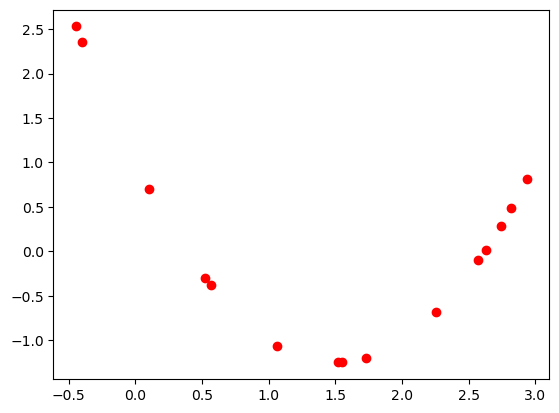

n_sample:  15 noise:  0.05


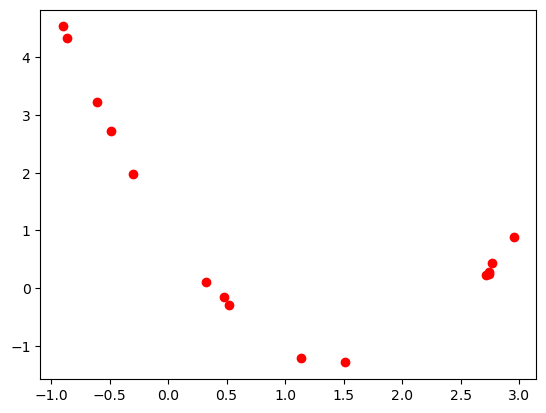

n_sample:  15 noise:  0.2


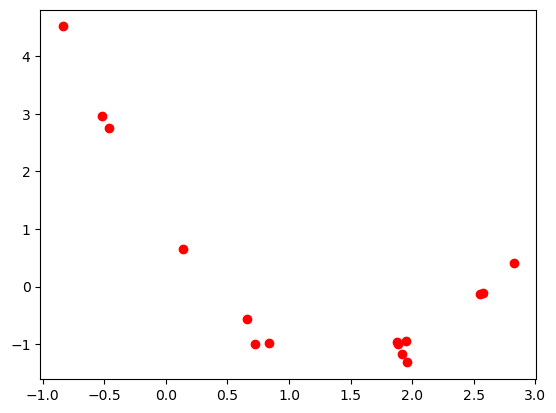

n_sample:  100 noise:  0


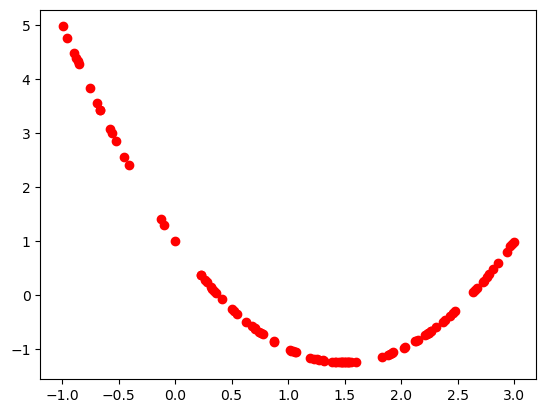

n_sample:  100 noise:  0.05


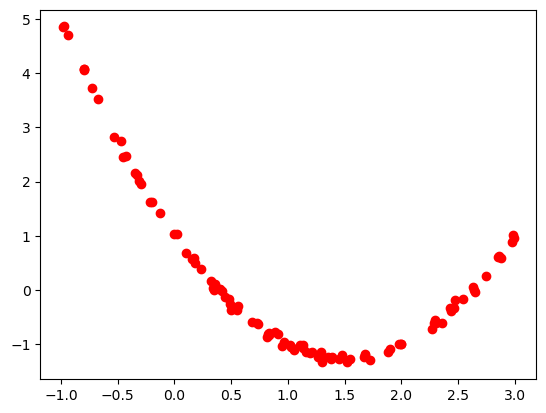

n_sample:  100 noise:  0.2


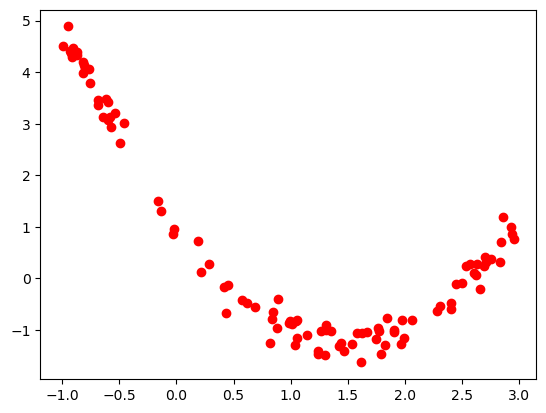

In [14]:
for n_sample in [15, 100]:
    for noise in [0, 0.05, 0.2]:
        data = problem2_evaluate_function_on_random_noise(n_sample, noise)
        print("n_sample: ", n_sample, "noise: ", noise)
        plt.plot(data[0], data[1], 'ro')
        plt.show()

## 1b

In [15]:
def plot_fitted_polynomial(data_x, data_y, degree, regularisation=0):
    
    coeffs = problem2_fit_polynomial(data_x, data_y, degree, regularisation)
    #plot polynomial with weights w on top of data
    plot_x = np.linspace(-1, 3, 100)
    plot_y = np.array([sum([w_i * x_i ** n for n, w_i in enumerate(coeffs)]) for x_i in plot_x])
    plt.plot(plot_x, plot_y, 'b-')

    #plot  on top
    plt.plot(data_x, data_y, 'ro')

    #plot polynomial with weights w on top of data
    predicted_y = np.array([sum([w_i * x_i ** n for n, w_i in enumerate(coeffs)]) for x_i in data_x])
    #MSE between predicted_y and data_y 
    mse = np.mean((predicted_y - data_y) ** 2)

    #add mse to plot
    plt.title("degrees: "+ str(degree)+", regularisation"+ str(regularisation) +", MSE: " + str(mse))

    #print("MSE: ", mse)
    return mse, coeffs

n_sample:  15 noise:  0


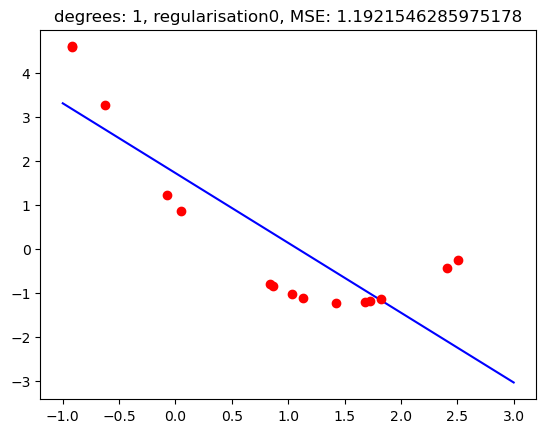

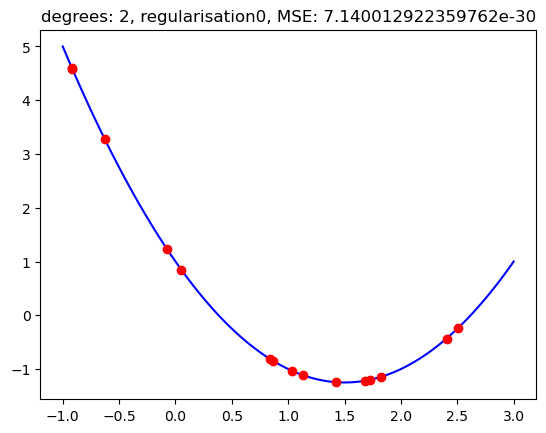

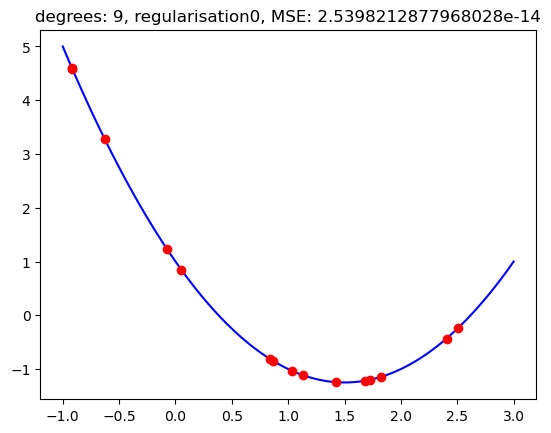

n_sample:  15 noise:  0.05


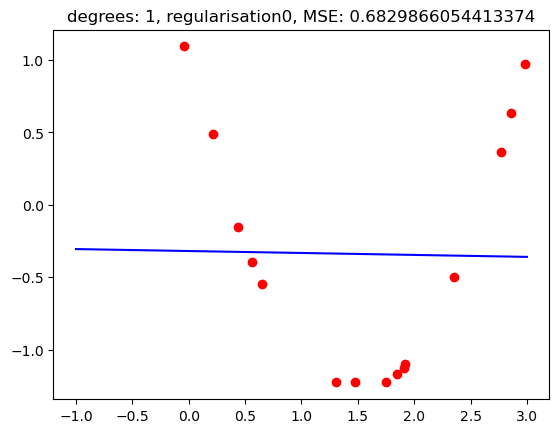

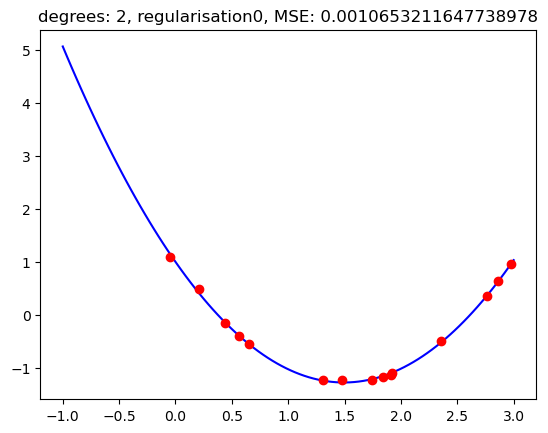

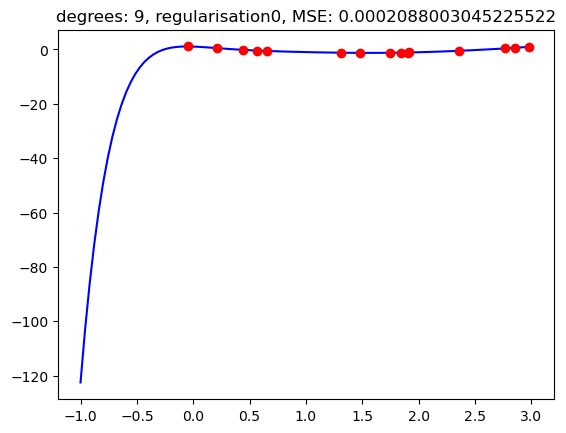

n_sample:  15 noise:  0.2


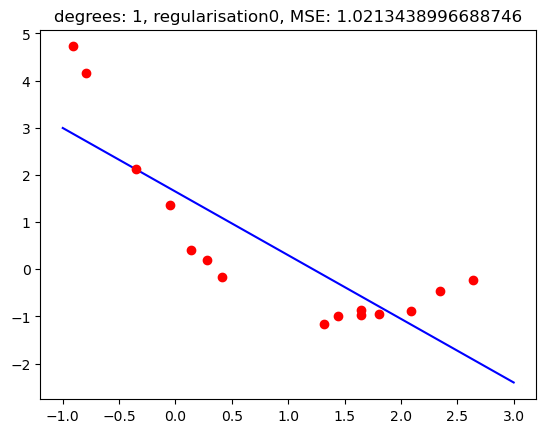

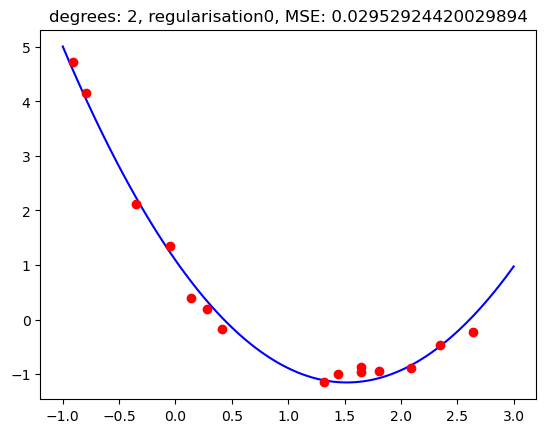

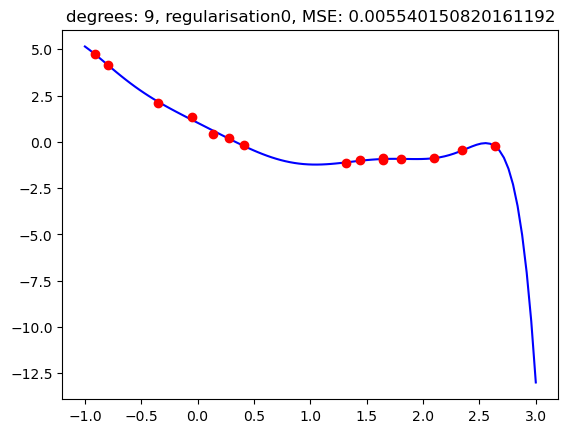

n_sample:  100 noise:  0


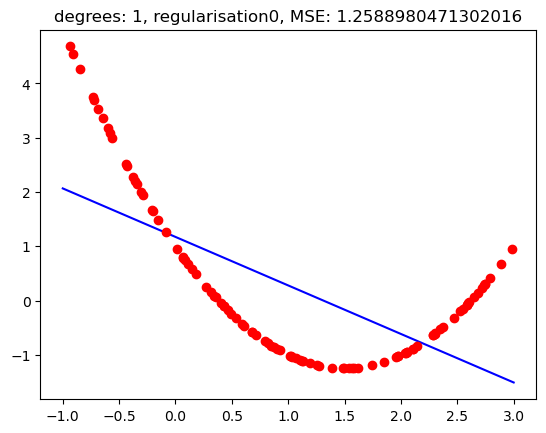

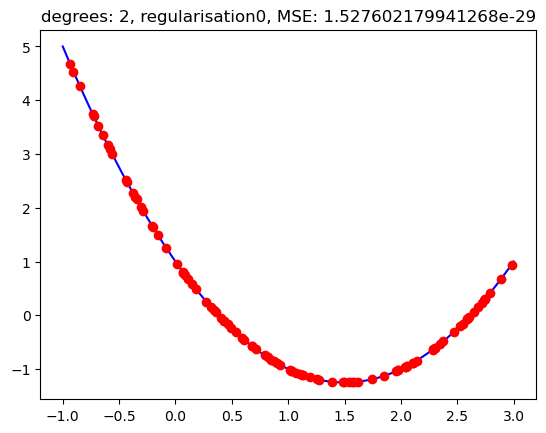

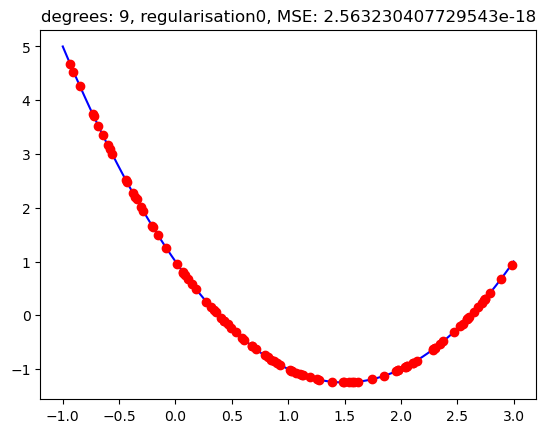

n_sample:  100 noise:  0.05


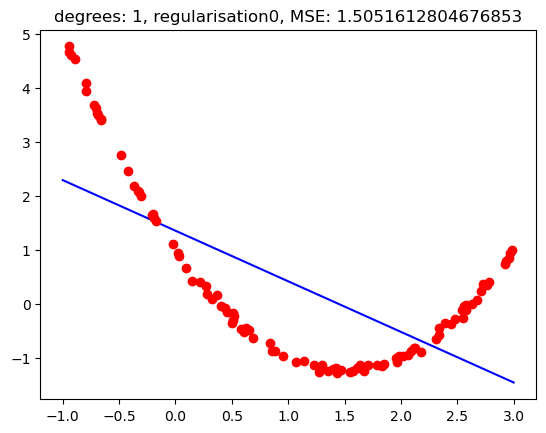

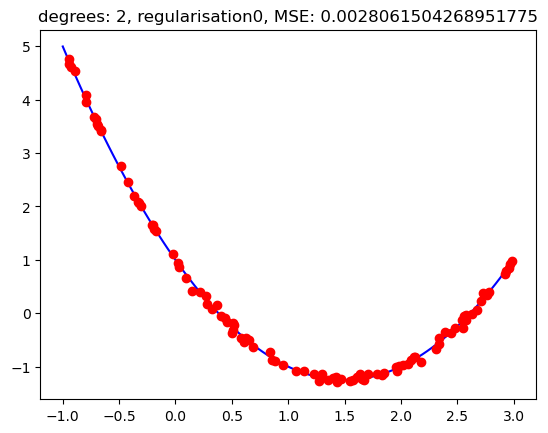

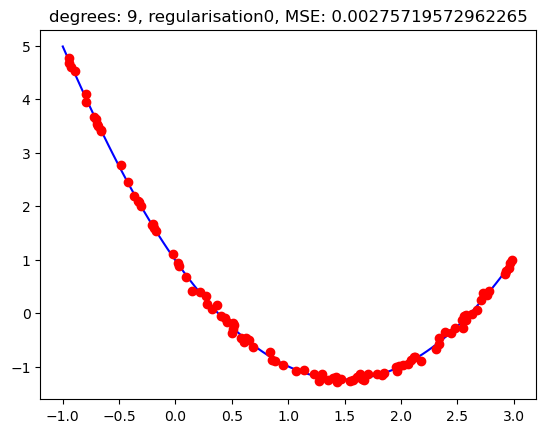

n_sample:  100 noise:  0.2


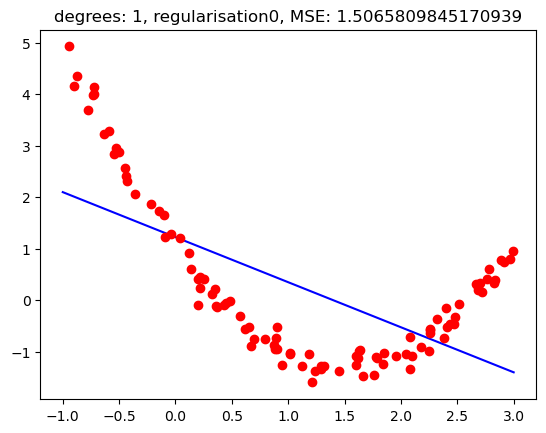

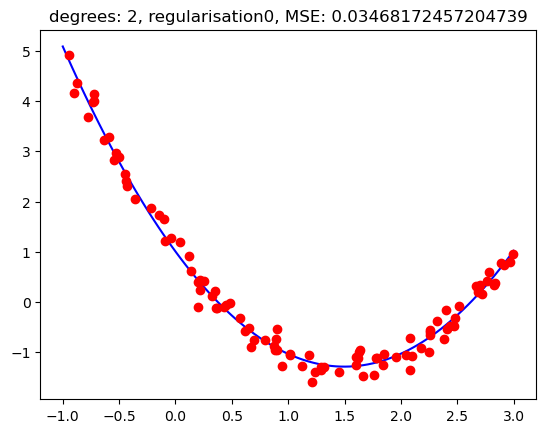

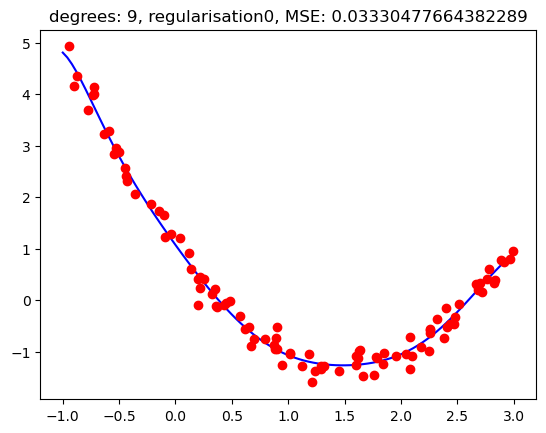

In [16]:
#create empty list
list_performance = list()

for n_sample in [15, 100]:
    for noise in [0, 0.05, 0.2]:
        data = problem2_evaluate_function_on_random_noise(n_sample, noise)
        print("n_sample: ", n_sample, "noise: ", noise)
        for degree in [1,2,9]:
            mse, coeffs = plot_fitted_polynomial(data[0], data[1], degree)
            #add mse, coeffs tupel to list
            list_performance.append((n_sample, noise, degree, mse, coeffs))
            plt.show()

Qualitatively assess: degree 1 always underfits.  best degree is 2, degree 9 overfits. This makes sense, because the actual underlying model has degree 2.  The degree 9 polynomial is too flexible and will overfit the data.

In [17]:
result = pd.DataFrame(list_performance, columns=["n_sample", "noise", "degree", "mse", "coeffs"])
#sort by mse
#result.sort_values(by="mse", inplace=True)
result

,n_sample,noise,degree,mse,coeffs
0,15,0.00,1,1.192155e+00,"[1.7190668313955149, -1.5864713282492393]"
1,15,0.00,2,7.140013e-30,"[1.0000000000000002, -2.9999999999999956, 0.99..."
2,15,0.00,9,2.539821e-14,"[1.0000001615100165, -3.0000001627484405, 1.00..."
3,15,0.05,1,6.829866e-01,"[-0.31879452536163566, -0.013456372197002936]"
4,15,0.05,2,1.065321e-03,"[1.0048075895904534, -3.0430776180856225, 1.01..."
5,15,0.05,9,2.088003e-04,"[1.0519282625294812, -1.4505518092867469, -10...."
6,15,0.20,1,1.021344e+00,"[1.647219150899124, -1.348992055523905]"
7,15,0.20,2,2.952924e-02,"[1.0872197162032258, -2.949028704636852, 0.970..."
8,15,0.20,9,5.540151e-03,"[1.0312260764802694, -3.0967695029469073, 0.02..."
9,100,0.00,1,1.258898e+00,"[1.1728566747216282, -0.8934739427149433]"


2c

n_sample:  15 noise:  0.05
regularisation:  0


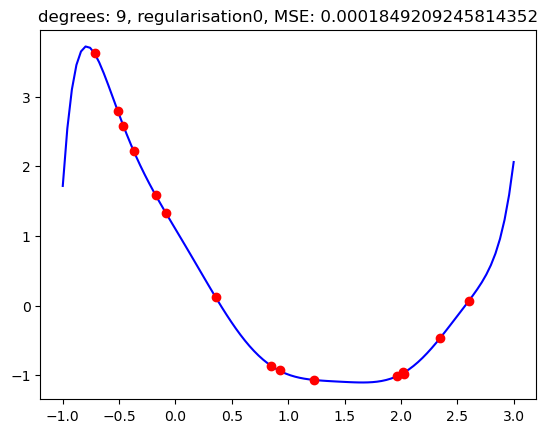

regularisation:  0.01


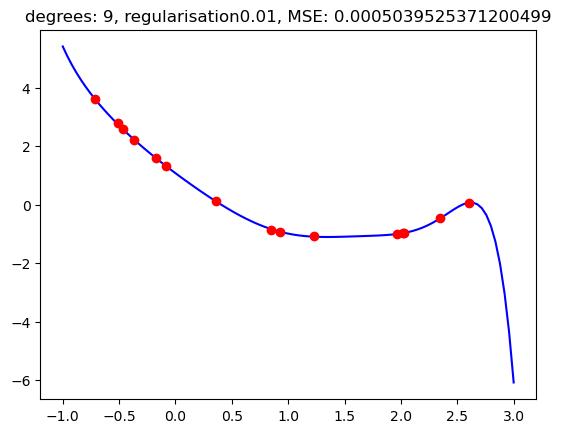

regularisation:  0.1


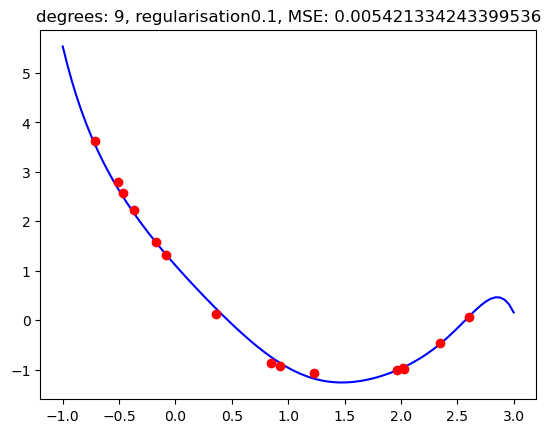

regularisation:  1


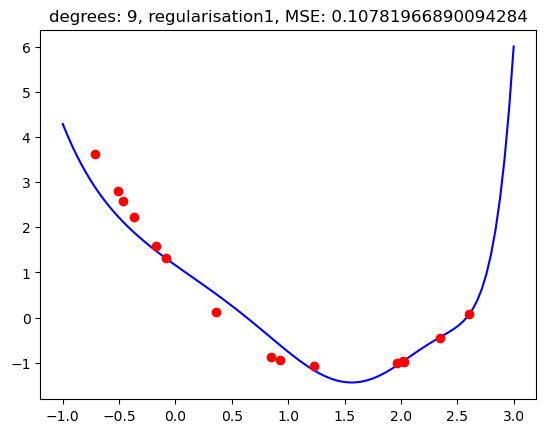

regularisation:  10


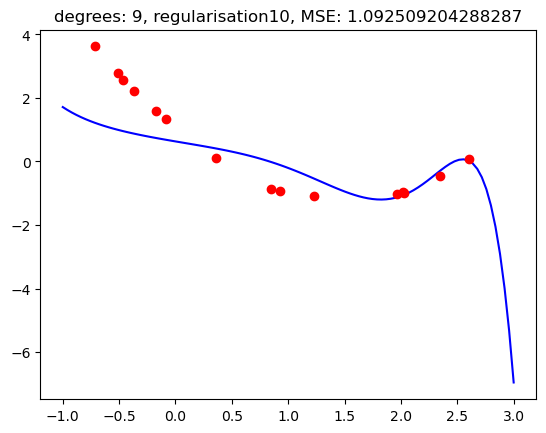

regularisation:  100


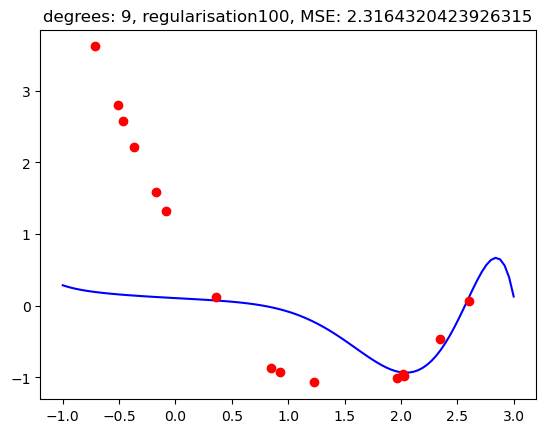

regularisation:  1000


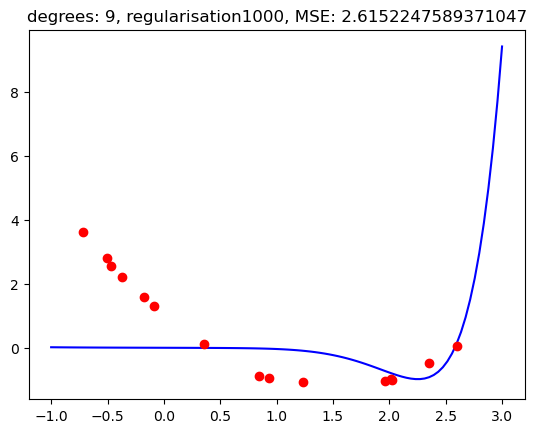

n_sample:  100 noise:  0.05
regularisation:  0


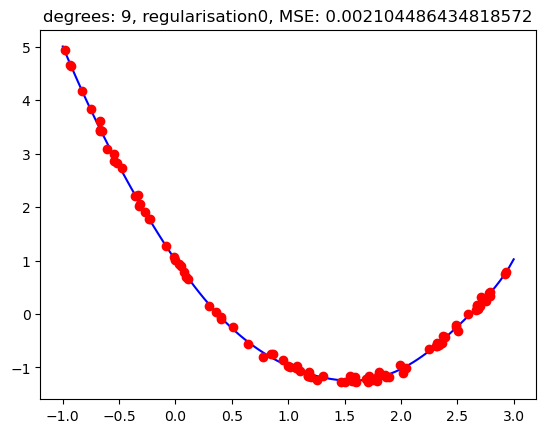

regularisation:  0.01


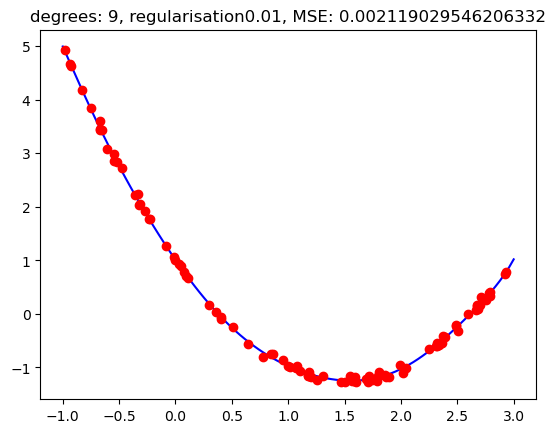

regularisation:  0.1


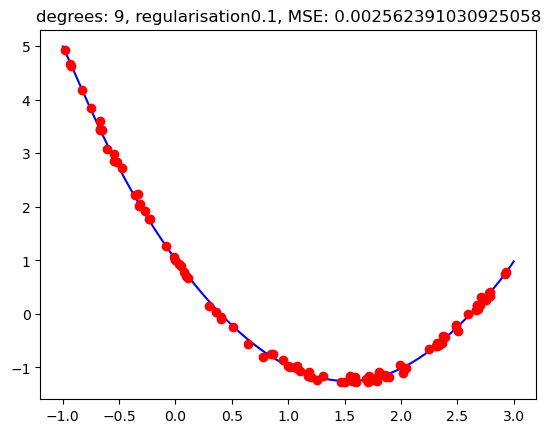

regularisation:  1


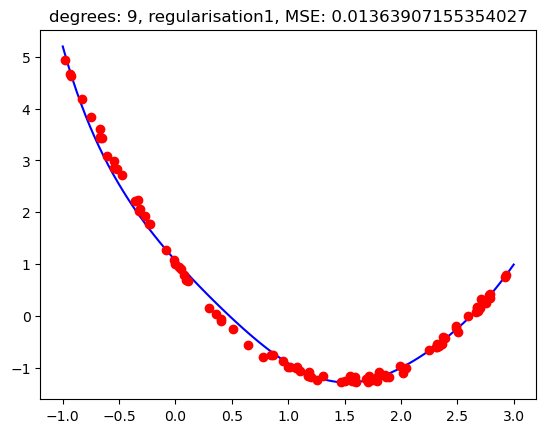

regularisation:  10


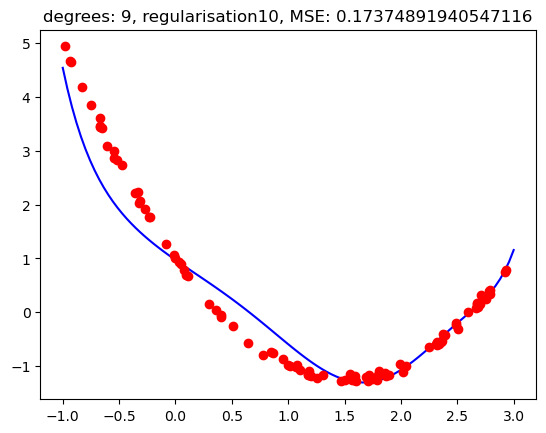

regularisation:  100


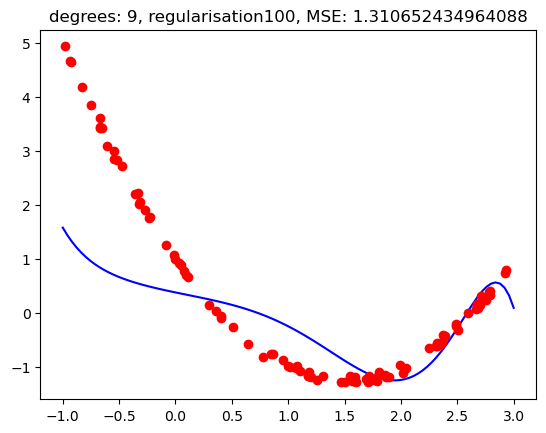

regularisation:  1000


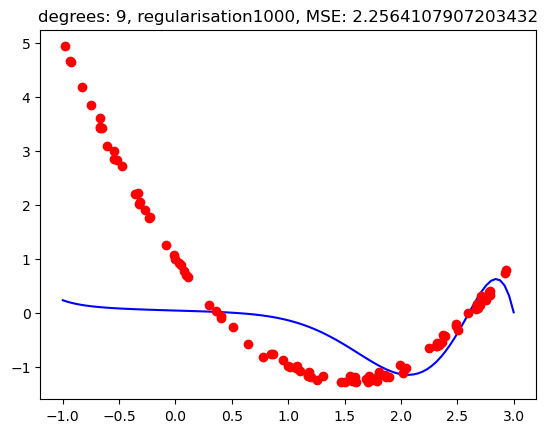

In [18]:
#create empty list
list_performance = list()

for n_sample in [15, 100]:
    for noise in [0.05]:
        data = problem2_evaluate_function_on_random_noise(n_sample, noise)
        print("n_sample: ", n_sample, "noise: ", noise)
        for degree in [9]:
            for regularisation in [0, 0.01, 0.1, 1, 10, 100, 1000]:
                print("regularisation: ", regularisation)
                mse, coeffs = plot_fitted_polynomial(data[0], data[1], degree, regularisation)
                #add mse, coeffs tupel to list
                list_performance.append((n_sample, noise, degree, regularisation, mse, coeffs))
                plt.show()
           

Regularisation 1000 results in underfitting. Regularisation 1 works well. Regularisation 0 results in overfitting.